## Problem 1: Numeric Variables
Dataset from Kaggle: "Housing Data"
***
#### Essential Libraries
>NumPy : Library for Numeric Computations in Python<br>
Pandas : Library for Data Acquisition and Preparation<<br>
Matplotlib : Low-level library for Data Visualization<br>
Seaborn : Higher-level library for Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#### Import House data
The dataset is in CSV format; hence we use the `read_csv` function from Pandas. 

In [2]:
housedata = pd.read_csv("train.csv")

#### Extract Numeric Variables
Extract `LotArea`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `SalePrice` from dataset, take a quick look at the data using the `head` function

In [3]:
houseNumdata = pd.DataFrame(housedata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumdata.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


#### Check the Numeric Variables Independently
**a)** Summary Statistics of `houseNumdata`, followed by Statistical Visualizations on the variables.

In [4]:
# Statistical description
houseNumdata.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


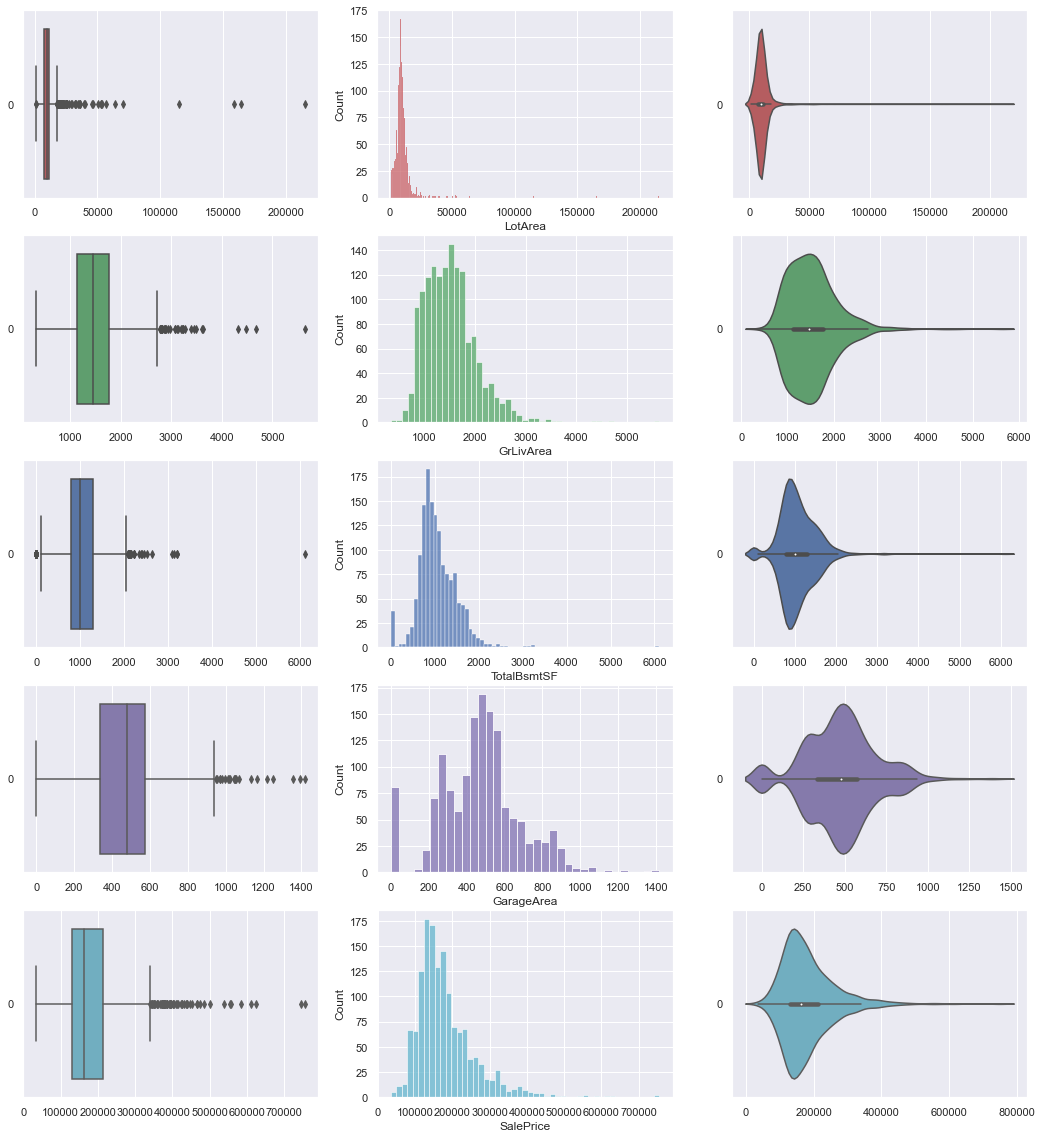

In [5]:
# Draw the distributions of all variables
f, axes = plt.subplots(5,3, figsize=(18, 20))
colors = ["r", "g","b", "m", "c"]

count = 0
for var in houseNumdata:
    sb.boxplot(data = houseNumdata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data = houseNumdata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data = houseNumdata[var], orient = "h", color = colors[count], ax = axes[count, 2])
    count += 1

#### Analyse and Discuss the Variable Distributions
**b)** Central Tendency and Spread of the data:

>*LotArea* is the most closely distributed.<br>
>*GrLivArea* looks the most close to a "Normal Distribution".<br>
>*TotalBsmtSF* and most of the other variables are positively skewed.<br>
>*GarageArea* has the largest spread (Inter-Quartile Range) of data.<br>
>*SalePrice* has the most outliers.

#### Check the Relationship amongst Variables
**c)** Correlation between the variables, followed by all bi-variate jointplots.

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

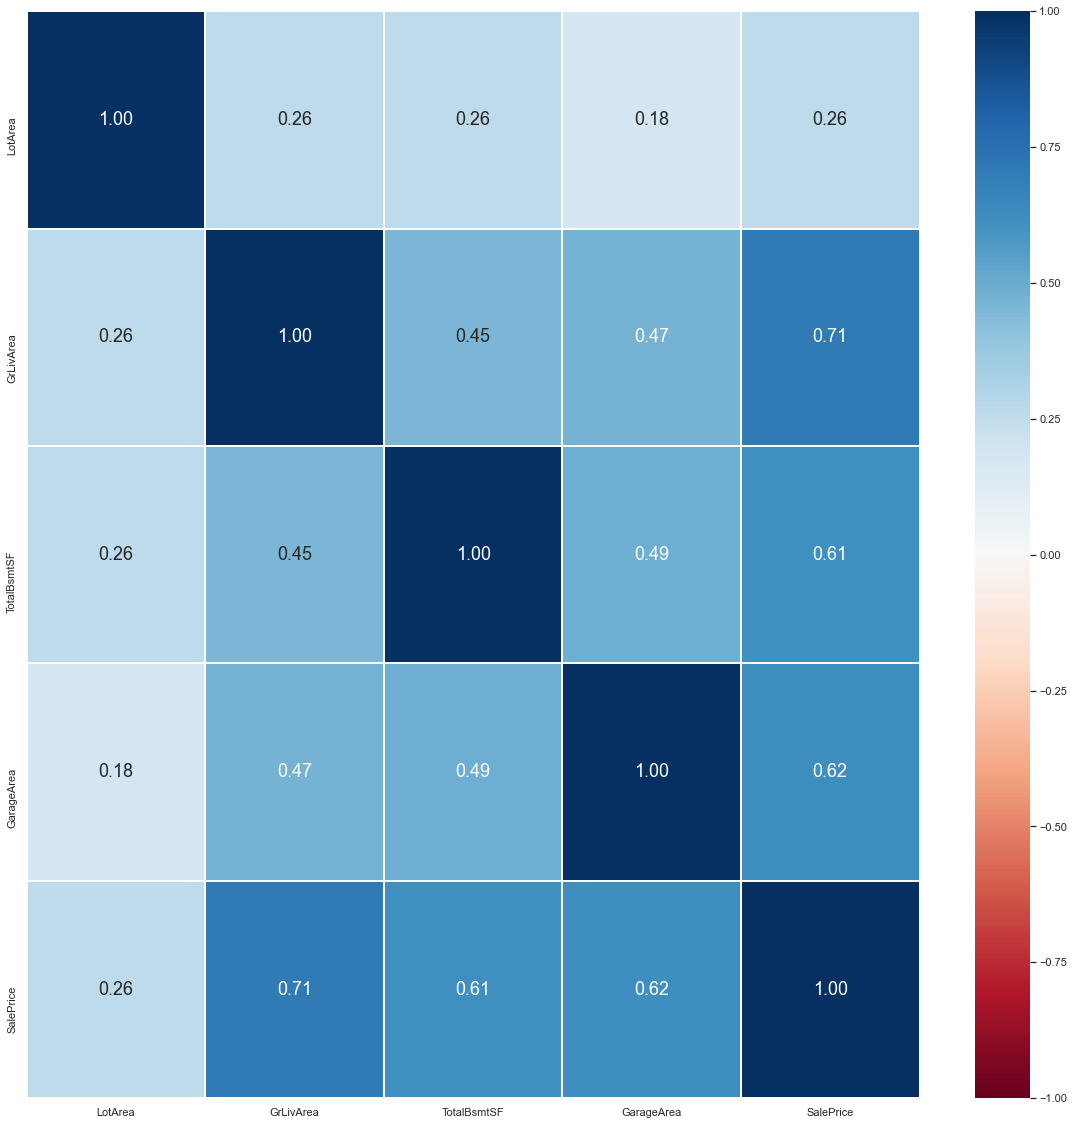

In [6]:
# Correlation Matrix
print(houseNumdata.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1,1, figsize=(20,20))
sb.heatmap(houseNumdata.corr(), vmin = -1, vmax = 1, linewidths = 1,
          annot = True, fmt = ".2f", annot_kws = {"size":18}, cmap = "RdBu")

*GvLiveArea* has the strongest correlation with *SalePrice*, Moderately High Positive Correlation.<br>
Followed by, *GarageArea* and *TotalBsmtSF* that also have Moderately High Positive Correlation with *SalePrice*.<br>

>This is useful as it generally means the bigger the space, the higher the cost.

**d)** Mutual jointplots and an overall pairplots

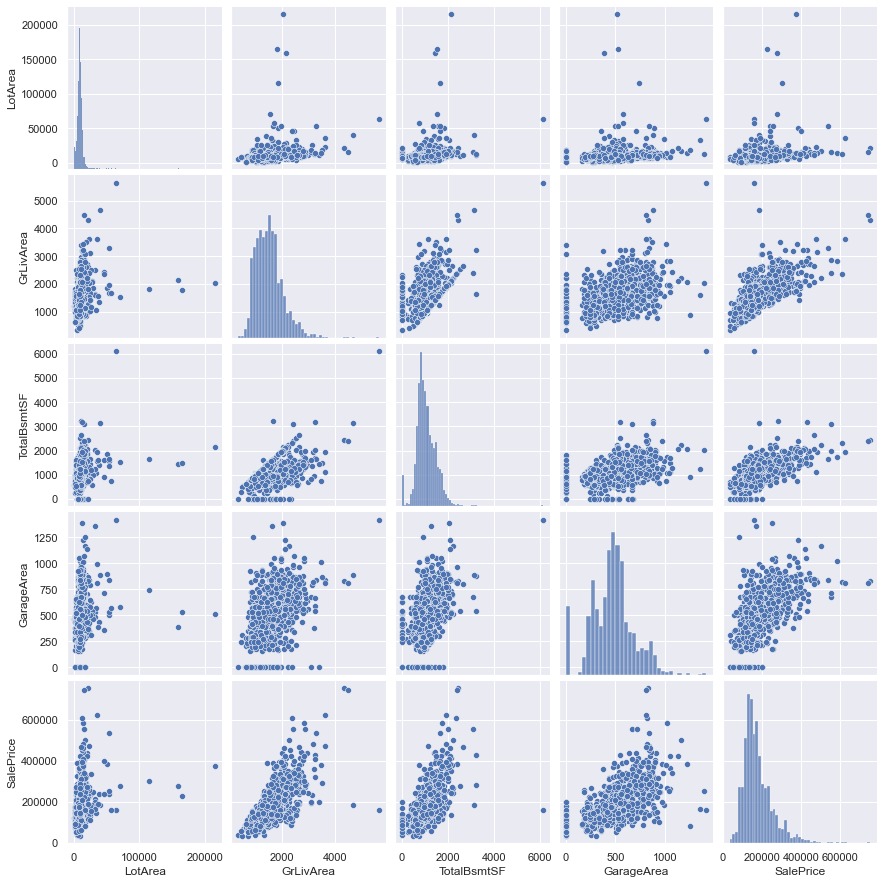

In [7]:
# Draw pairs of variables against one another
sb.pairplot(data = houseNumdata)

`GvLiveArea` has the strongest linear relation with SalePrice, followed by `TotalBsmtSF`, *Moderately-Strong Positive Linear relation.*<br>
`GarageArea` and `LotArea` have *Moderately Weak Positive Linear relation* with SalePrice.<br>

>This is useful as it can be deduced from the patterns which generally means the bigger the space, the higher the cost.

***
## Problem 2 : Statistical Summary
***
#### Extract Categorical Variables
Extract `MSSubClass`, `Neighborhood`, `BldgType`, `OverallQual` from dataset, take a quick look at the data using the `head` function.

In [8]:
houseCatdata = pd.DataFrame(housedata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatdata.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


**a)** Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [9]:
houseCatdata['MSSubClass'] = houseCatdata['MSSubClass'].astype('category')
houseCatdata['Neighborhood'] = houseCatdata['Neighborhood'].astype('category')
houseCatdata['BldgType'] = houseCatdata['BldgType'].astype('category')
houseCatdata['OverallQual'] = houseCatdata['OverallQual'].astype('category')

In [10]:
houseCatdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


#### Check the Variables Independently
**b)** Summary Statistics of `houseCatdata`, followed by Statistical Visualization of the variables.

In [11]:
houseCatdata.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


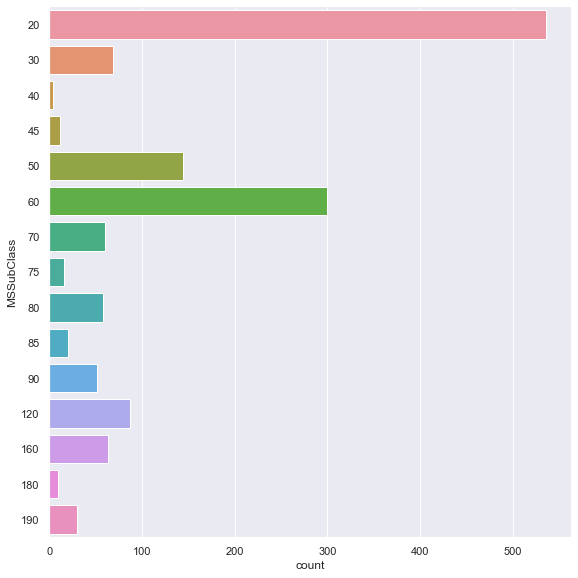

In [12]:
sb.catplot(y='MSSubClass', data = houseCatdata, kind = 'count', height = 8)

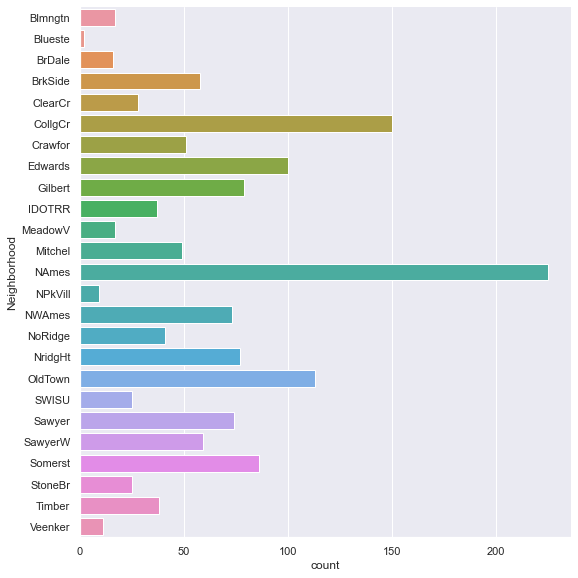

In [13]:
sb.catplot(y='Neighborhood', data = houseCatdata, kind = 'count', height = 8)

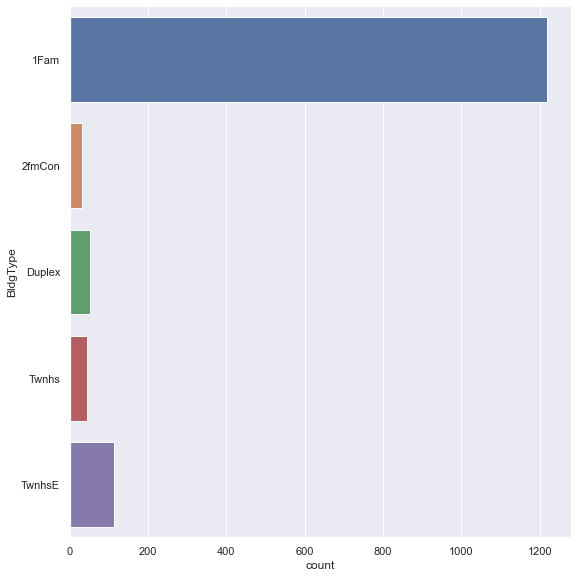

In [14]:
sb.catplot(y='BldgType', data = houseCatdata, kind = 'count', height = 8)

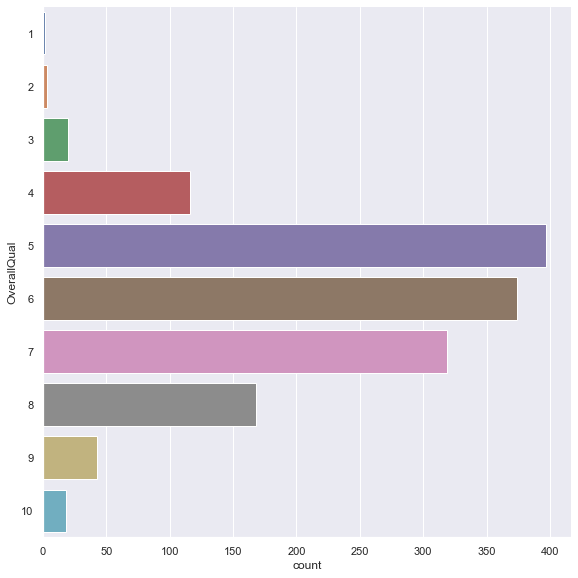

In [15]:
sb.catplot(y='OverallQual', data = houseCatdata, kind = 'count', height = 8)

**c)** Joint heatmaps of some of the important bi-variate relationships in `houseCatdata`.

<AxesSubplot:xlabel='MSSubClass', ylabel='BldgType'>

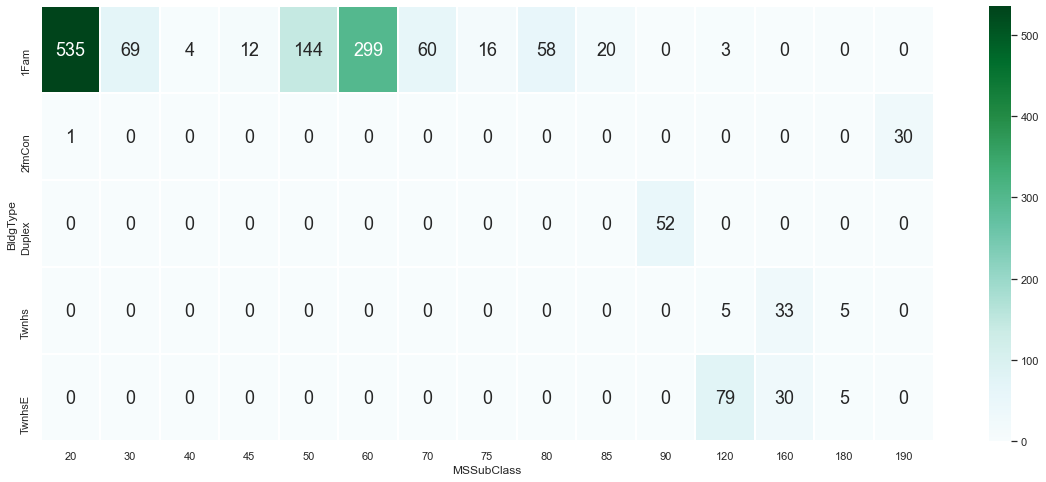

In [16]:
#Distribution of BldgType across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatdata.groupby(['BldgType', 'MSSubClass']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size":18}, cmap = "BuGn")

groupby() and size()

>groupby() - for each BldgType value, say 1Fam, group it with each individual MSSubClass value, i.e. 20,30 etc.<br><br>
>size() - gives the number of items pertaining to each group

In [17]:
houseCatdata.groupby(['BldgType', 'MSSubClass']).size()

BldgType  MSSubClass
1Fam      20            535
          30             69
          40              4
          45             12
          50            144
                       ... 
TwnhsE    90              0
          120            79
          160            30
          180             5
          190             0
Length: 75, dtype: int64

unstack() - to "unstack" so that MSSubClass values become column headers while BldgType values remain as row headers

In [18]:
houseCatdata.groupby(['BldgType', 'MSSubClass']).size().unstack()

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
BldgType,,,,,,,,,,,,,,,
1Fam,535,69,4,12,144,299,60,16,58,20,0,3,0,0,0
2fmCon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30
Duplex,0,0,0,0,0,0,0,0,0,0,52,0,0,0,0
Twnhs,0,0,0,0,0,0,0,0,0,0,0,5,33,5,0
TwnhsE,0,0,0,0,0,0,0,0,0,0,0,79,30,5,0


<AxesSubplot:xlabel='OverallQual', ylabel='BldgType'>

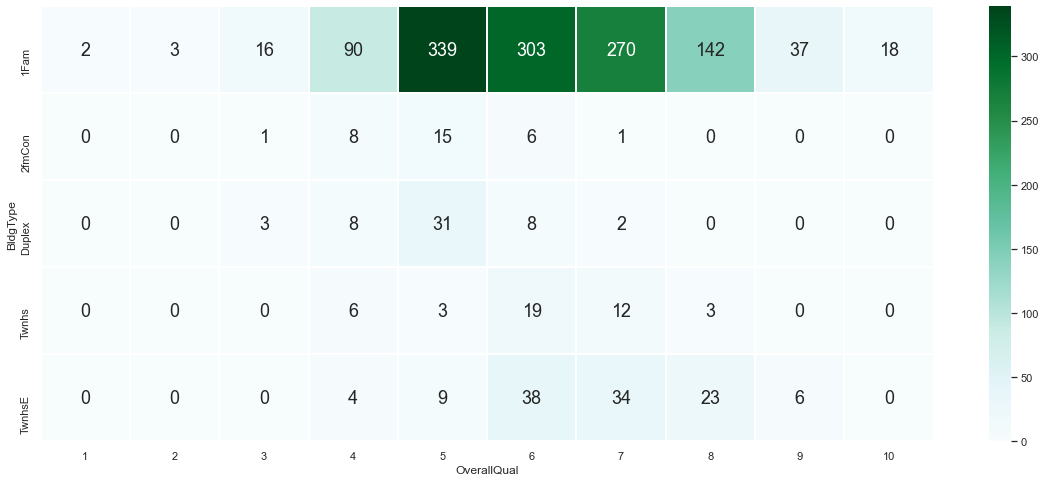

In [19]:
#Distribution of BldgType across OverallQual
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatdata.groupby(['BldgType', 'OverallQual']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size":18}, cmap = "BuGn")

<AxesSubplot:xlabel='OverallQual', ylabel='Neighborhood'>

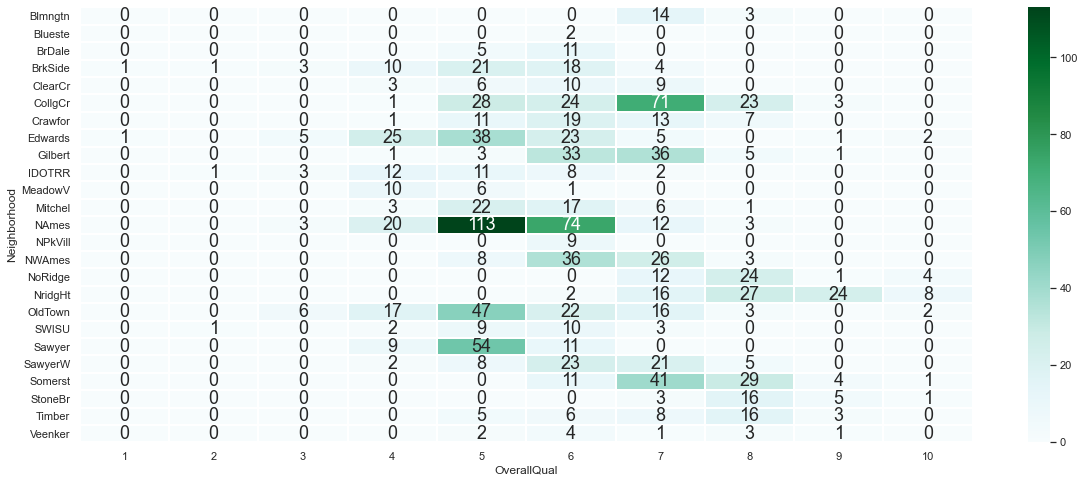

In [20]:
#Distribution of Neighborhood across OverallQual
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatdata.groupby(['Neighborhood', 'OverallQual']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size":18}, cmap = "BuGn")

<AxesSubplot:xlabel='OverallQual', ylabel='MSSubClass'>

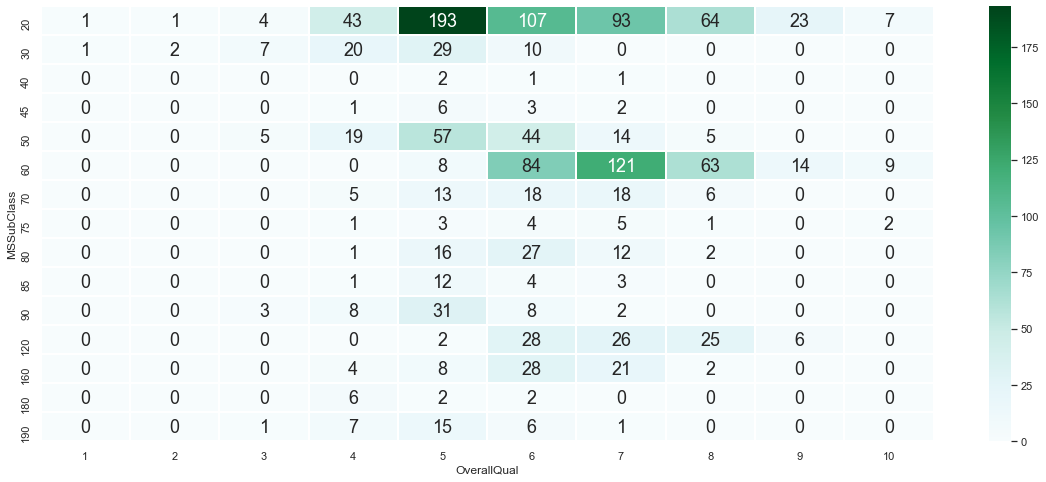

In [21]:
#Distribution of MSSubClass across OverallQual
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(houseCatdata.groupby(['MSSubClass', 'OverallQual']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size":18}, cmap = "BuGn")

**d)** Create a joint DataFrame by concatenating `SalePrice` to `houseCatData`.

In [22]:
saleprice = pd.DataFrame(housedata['SalePrice'])
houseCatSale = pd.concat([houseCatdata, saleprice], axis = 1)
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


Check the distribution of `SalePrice` across different `MSSubClass`.<br><br>
For boxplot function of SalePrice against variable/column,<br><br>
Set y = 'SalePrice', x = another variable/column,<br>
data = table name<br><br>
#### --

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

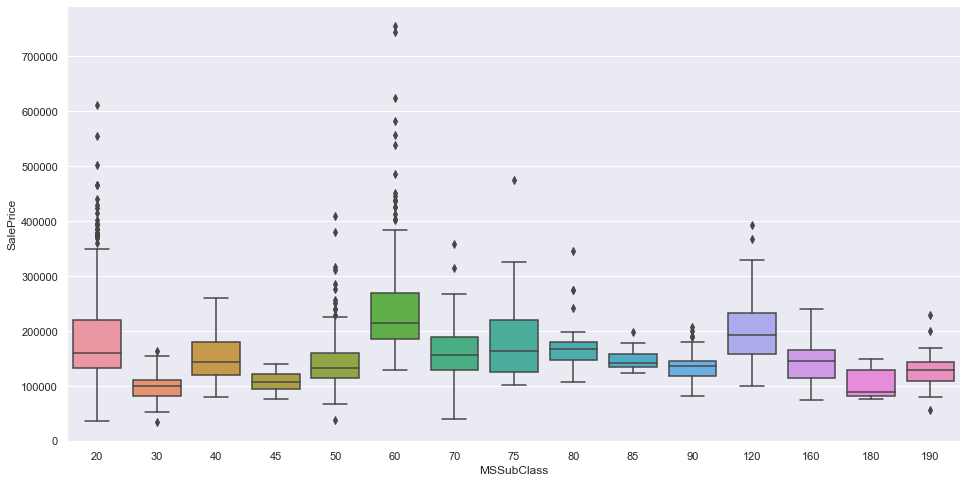

In [23]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

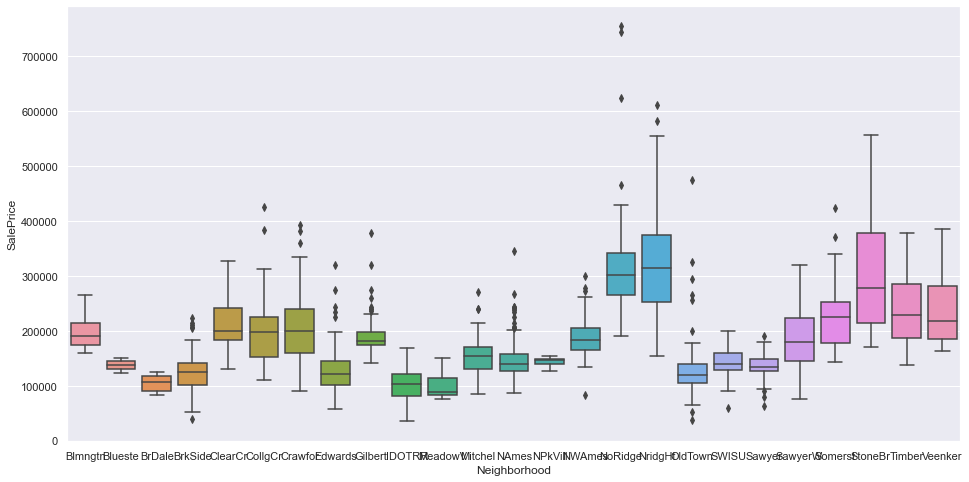

In [24]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

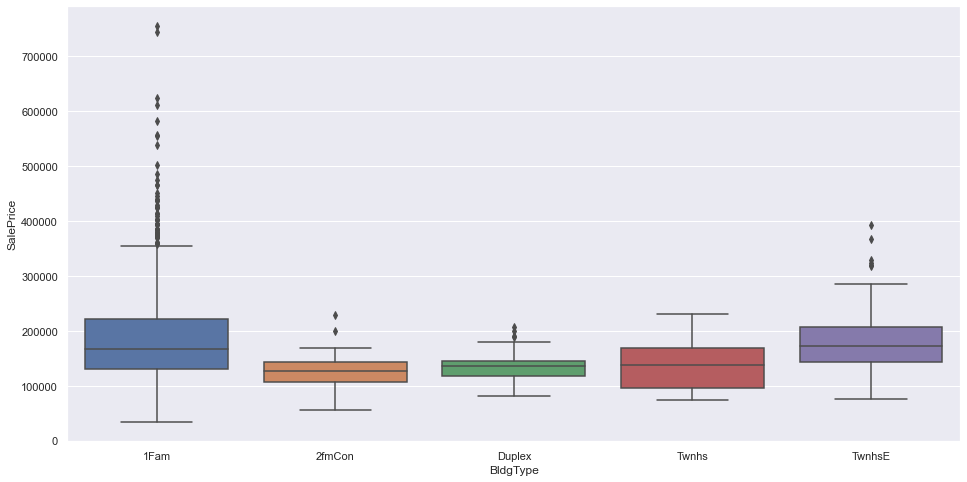

In [25]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

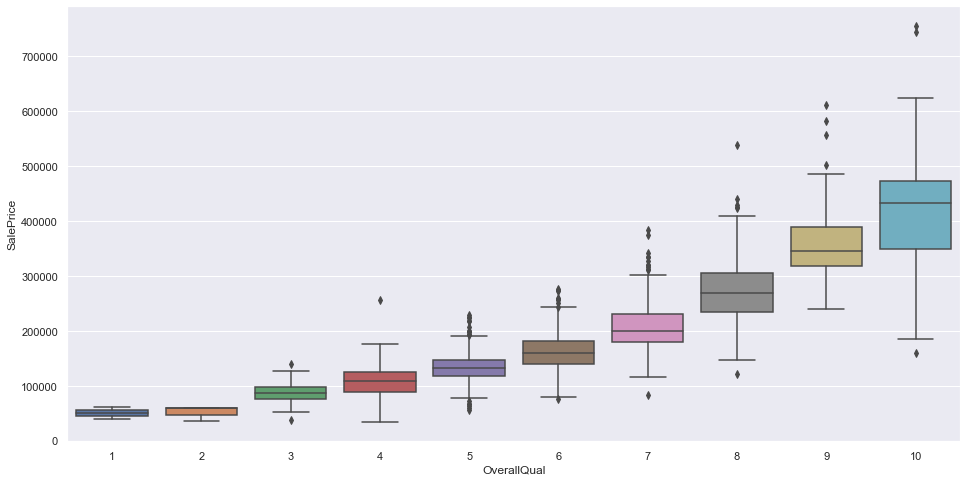

In [26]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale)

#### Which variable do you think will help us predict `SalePrice` in this dataset?
>`OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels<br>
>`Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels<br>
>`BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels<br>

Bonus : Attempt a comprehensive analysis with all Categorical variables in the dataset.